# <center>MATHEMATICS AND STATISTICS FOR DATA SCIENCE</center>
<center>Thời gian: 180 phút</center>
<center>Ngày thi: 20/09/2020</center>
<center> ****** </center>
<center>Thí sinh: <b>TRẦN HOÀNG BÁCH  </b> </center>    
<center>   ---   </b> </center>  
<center>Câu 1: Giảm chiều dữ liệu </b> </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
# Load data
data = pd.read_csv('Data/Breast Cancer.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
# Check xem data có lỗi gì ko, null value or error value, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


## Câu 1.1

In [4]:
# Lấy Age - MCP.1 để làm input cho PCA
df = data.drop(['Classification'], axis=1)
# Tạo module PCA và fit data df
pca = PCA().fit(df)
# Tạo bảng tính toán mức độ giải thích dữ liệu với số chiều lựa chọn tương ứng với phương pháp PCA
k = pd.DataFrame({'Dimension': np.arange(1,pca.n_components_ + 1),'Cum ratio': np.cumsum(pca.explained_variance_ratio_)})
k

,Dimension,Cum ratio
0,1,0.988347
1,2,0.993551
2,3,0.996003
3,4,0.997962
4,5,0.998957
5,6,0.999542
6,7,0.999886
7,8,0.999994
8,9,1.000000


In [5]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


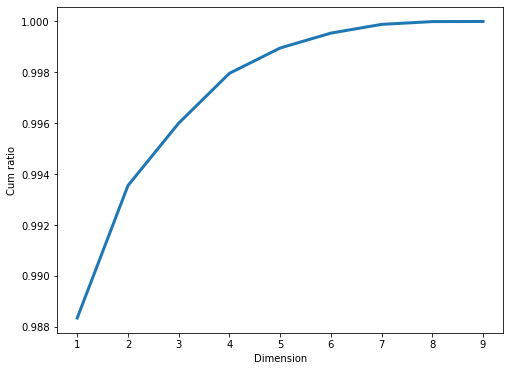

In [6]:
# Vẽ biểu đồ cho mức độ giải thích dữ liệu với số chiều lựa chọn tương ứng
plt.figure(figsize=(8,6))
sb.lineplot(data=k, x='Dimension', y='Cum ratio', linewidth=3)
plt.show()

**Nhận xét:**   

* Với số chiều k=3 đã có thể giải thích được 99.6% dữ liệu so với dữ liệu gốc dựa trên phương pháp PCA  

==> Nên lựa chọn giảm chiều từ 9 xuống k=3 là tương đối phù hợp với bộ dữ liệu này.

In [7]:
# Tiến hành PCA với k = 3
pca = PCA(3)
# Bộ dữ liệu được transform theo 3 chiều dữ liệu mới
P = pca.fit_transform(df)
df2 = pd.DataFrame(P, columns=['Component 1', 'Component 2', 'Component 3'])
df2

,Component 1,Component 2,Component 3
0,-118.146727,-33.745254,-0.053484
1,-66.125997,-10.355521,-23.071916
2,19.768220,-7.546286,-13.536772
3,393.026665,-31.556932,-6.313411
4,239.018611,-15.045195,-23.204534
...,...,...,...
111,-266.530287,9.649936,27.210442
112,-204.579329,-3.916032,-15.976271
113,-220.636499,21.076102,24.172484
114,-142.707816,-11.841128,-1.671095


## Câu 1.2

In [8]:
# Tiến hành PCA với k = 2
pca = PCA(2)
# Bộ dữ liệu được transform theo 2 chiều dữ liệu mới
P = pca.fit_transform(df)
df3 = pd.DataFrame(P, columns=['Component 1', 'Component 2'])
df3.head()

,Component 1,Component 2
0,-118.146727,-33.745254
1,-66.125997,-10.355521
2,19.768220,-7.546286
3,393.026665,-31.556932
4,239.018611,-15.045195


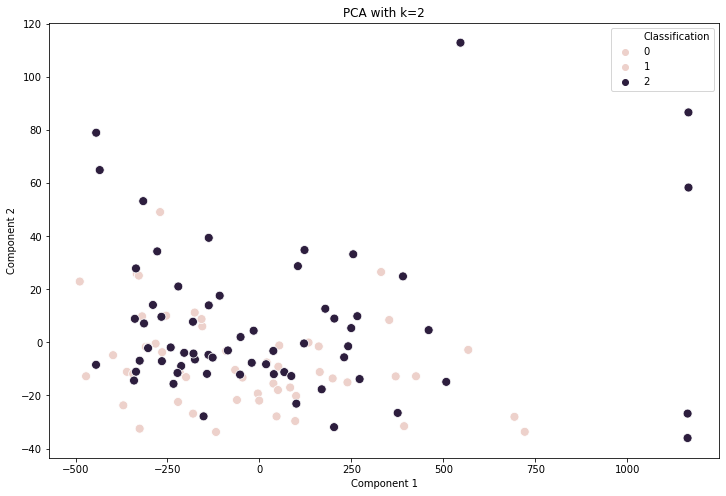

In [9]:
# Trực quan hoá dữ liệu theo 2 chiều
plt.figure(figsize=(12,8))
sb.scatterplot(data=df3, x='Component 1', y='Component 2', hue=data['Classification'], s=80)
plt.title('PCA with k=2')
plt.show()

Nhận xét:  

* Với 2 chiều dữ liệu, tuy mức độ giải thích lên tới 99.35% **nhưng không thể phân thành 2 cụm rõ ràng như để phân lớp bệnh nhân ung thư theo Classification {1,2}**  

* Cần sử dụng 1 phương pháp khác để có thể phân loại dữ liệu, từ đó predict Classification phù hợp hơn